# Numerical Differentiation

Derivative

In [71]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

Example

In [72]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

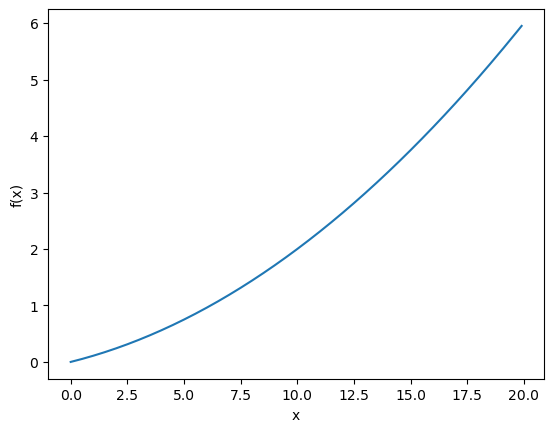

In [73]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [74]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


Partial Derivatives

$ f({x}_{0},\, {x}_{1})={x}^{2}_{0}+{x}^{2}_{1} $

In [75]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

In [76]:
def function_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0

print(numerical_diff(function_tmp1, 3.0))

6.00000000000378


In [77]:
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

print(numerical_diff(function_tmp2, 4.0))

7.999999999999119


Gradient

In [78]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # calc f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # calc f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
    
    return grad

In [79]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


# Gradient Method

In [80]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

In [86]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [87]:
# High Learning Rate (lr = 10.0)
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [88]:
# Low Learning Rate (lr = 1e-10)
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])